In [1]:
suppressMessages({
    require(bit64, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(magrittr, quietly=TRUE)
    require(mongolite, quietly=TRUE)
})

In [2]:
ibs <- mongo(url="mongodb://thelio", db="leios", collection="ibs")$find() %>% data.table
ibs %>% summary

     time_s         size_bytes    
 Min.   :  0.13   Min.   :102704  
 1st Qu.: 29.13   1st Qu.:102704  
 Median : 58.13   Median :102704  
 Mean   : 58.39   Mean   :102704  
 3rd Qu.: 88.13   3rd Qu.:102704  
 Max.   :119.13   Max.   :102704  

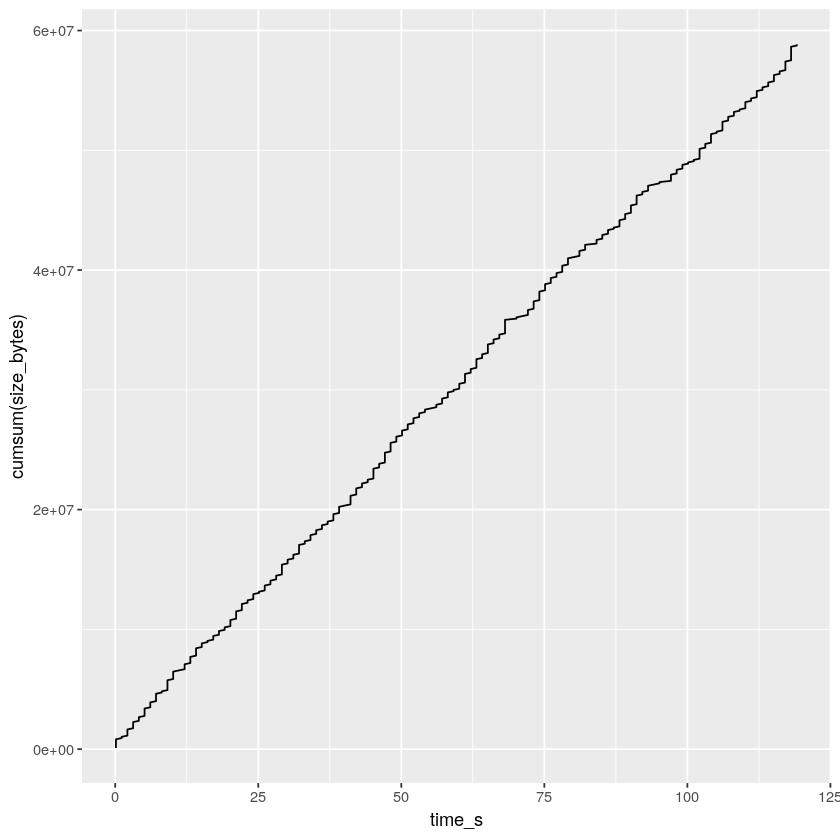

In [3]:
ggplot(ibs, aes(`time_s`, y=cumsum(`size_bytes`))) +
  geom_line()

In [4]:
ibElapsed <- mongo(url="mongodb://thelio", db="leios", collection="ibElapsed")$find() %>% data.table
ibElapsed %>% summary

     time_s              ib                 node         elapsed_s      
 Min.   :  0.2571   Length:56071       Min.   : 0.00   Min.   : 0.1055  
 1st Qu.: 30.0730   Class :character   1st Qu.:25.00   1st Qu.: 1.1111  
 Median : 58.8695   Mode  :character   Median :50.00   Median : 1.5646  
 Mean   : 59.3352                      Mean   :49.51   Mean   : 1.6422  
 3rd Qu.: 89.2026                      3rd Qu.:75.00   3rd Qu.: 2.0591  
 Max.   :119.9991                      Max.   :99.00   Max.   :11.6145  

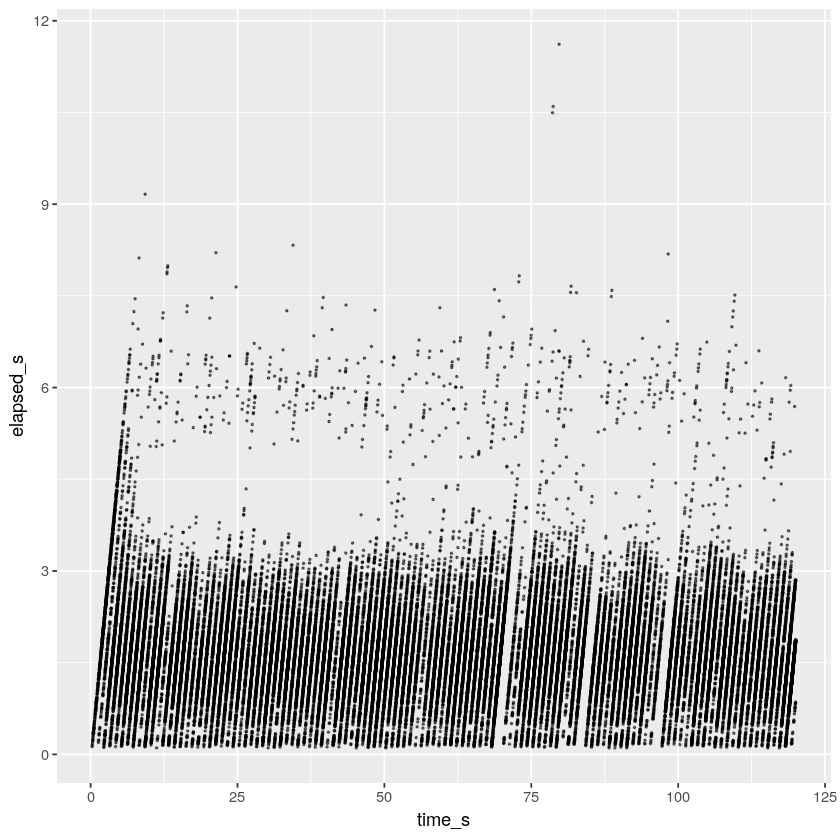

In [11]:
ggplot(ibElapsed, aes(x=`time_s`, y=`elapsed_s`)) +
  geom_point(size=0.33, alpha=0.50)
  #geom_smooth(formula = y ~ x, method="loess", span=5, method.args=list(degree=1), color="blue")

In [12]:
ggsave("elapsed_s.png", width=8, height=6, units="in", dpi=150)

In [7]:
# TODO: Manually set Loess parameters